# Query ODE/PDS product-types

Relevant topics:
- ODE REST API: http://oderest.rsl.wustl.edu/
    * API manual: http://oderest.rsl.wustl.edu/ODE_REST_V2.1.pdf
    
The first thing we want to know is which datasets (PDS' _data product-types_) are available for downloading, and how to ask for them in ODE's API.
The API provides an endpoint to make those queries, such queries are referred as "IIPT" in the documentation.

In [1]:
import gpt

from gpt.search import ode

In [2]:
from importlib import reload
from pathlib import Path

In [3]:
# Define the region to search for products/footprints
#
bounding_box = [-0.5, -0.5, 1.5, 1.5]

# Define where to write the table retrieved by our search
#
datastore_path = Path('.')

## First, use the functions available in GPT-search' ODE module

In [4]:
ode.available_datasets('mars')

DataSetId  \
ODEMetaDB IHID    IID   PT                                                           
Mars      EM16TGO ACS   CALANC                      em16_tgo_acs/calibration_files   
                        CNIRMIR                       em16_tgo_acs/data_calibrated   
                        PARHK                em16_tgo_acs/data_partially_processed   
                        PARSC                em16_tgo_acs/data_partially_processed   
                        RAWHK                                em16_tgo_acs/data_raw   
...                                                                            ...   
          VO      VISAB DTM                               VO1/VO2-M-VIS-5-DTM-V1.0   
                        EDR                               VO1/VO2-M-VIS-2-EDR-V2.0   
                        MDIM     VO1/VO2-M-VIS-5-DIM-V2.0 (and VO1/VO2-M-VIS-5-...   
                        MDIMC                             VO1/VO2-M-VIS-5-DIM-V1.0   
                        MDIMH                             VO1/VO2-M-VIS-5-DIM-V1.0   

                                                    IHName  \
ODEMetaDB IHID    IID   PT                                   
Mars      EM16TGO ACS   CALANC   ExoMars Trace Gas Orbiter   
                        CNIRMIR  ExoMars Trace Gas Orbiter   
                        PARHK    ExoMars Trace Gas Orbiter   
                        PARSC    ExoMars Trace Gas Orbiter   
                        RAWHK    ExoMars Trace Gas Orbiter   
...                                                    ...   
          VO      VISAB DTM         Viking Orbiter 1 and 2   
                        EDR         Viking Orbiter 1 and 2   
                        MDIM        Viking Orbiter 1 and 2   
                        MDIMC       Viking Orbiter 1 and 2   
                        MDIMH       Viking Orbiter 1 and 2   

                                                               IName  \
ODEMetaDB IHID    IID   PT                                             
Mars      EM16TGO ACS   CALANC           Atmospheric Chemistry Suite   
                        CNIRMIR          Atmospheric Chemistry Suite   
                        PARHK            Atmospheric Chemistry Suite   
                        PARSC            Atmospheric Chemistry Suite   
                        RAWHK            Atmospheric Chemistry Suite   
...                                                              ...   
          VO      VISAB DTM      Visual Imaging Subsystem Camera A/B   
                        EDR      Visual Imaging Subsystem Camera A/B   
                        MDIM     Visual Imaging Subsystem Camera A/B   
                        MDIMC    Visual Imaging Subsystem Camera A/B   
                        MDIMH    Visual Imaging Subsystem Camera A/B   

                                                                            PTName  \
ODEMetaDB IHID    IID   PT                                                           
Mars      EM16TGO ACS   CALANC                       Calibration Product Ancillary   
                        CNIRMIR  Calibrated Science Data from the NIR or MIR Ch...   
                        PARHK               Partially Processed House Keeping Data   
                        PARSC                     Partially Processed Science Data   
                        RAWHK                               Raw House Keeping Data   
...                                                                            ...   
          VO      VISAB DTM                                 Digital Terrain Models   
                        EDR                                 Experiment Data Record   
                        MDIM                        Mosaicked Digital Image Models   
                        MDIMC    Multi-look Color - Mosaicked Digital Image Models   
                        MDIMH     High Resolution - Mosaicked Digital Image Models   

                                NumberProducts  
ODEMetaDB IHID    IID   PT                

In [5]:
ode.available_datasets('mars', minimal=True)

,ODEMetaDB,IHID,IID,PT
0,Mars,EM16TGO,ACS,CALANC
1,Mars,EM16TGO,ACS,CNIRMIR
2,Mars,EM16TGO,ACS,PARHK
3,Mars,EM16TGO,ACS,PARSC
4,Mars,EM16TGO,ACS,RAWHK
...,...,...,...,...
104,Mars,VO,VISAB,DTM
105,Mars,VO,VISAB,EDR
106,Mars,VO,VISAB,MDIM
107,Mars,VO,VISAB,MDIMC


In [6]:
result = ode.search(bounding_box, target='mars', ihid='mro', iid='ctx', pt='edr', match='contain')
result

[{'BB_georeferenced': 'True',
  'Center_georeferenced': 'True',
  'Center_latitude': '0.0198',
  'Center_longitude': '0',
  'Comment': 'Meridiani Planum',
  'Data_Set_Id': 'MRO-M-CTX-2-EDR-L0-V1.0',
  'Easternmost_longitude': '359.82',
  'Emission_angle': '0.2',
  'External_url': 'https://pds-imaging.jpl.nasa.gov/pds/prod?q=OFSN+%3D/data/mro/mars_reconnaissance_orbiter/ctx/mrox_0433/data/P16_007361_1800_XN_00S000W.IMG+AND+RT+%3D+PDS_ZIPN',
  'External_url2': 'http://viewer.mars.asu.edu/planetview/inst/ctx/P16_007361_1800_XN_00S000W#start',
  'FilesURL': 'https://ode.rsl.wustl.edu/mars/productfiles.aspx?product_id=P16_007361_1800_XN_00S000W&product_idGeo=9083270',
  'Footprint_C0_geometry': 'POLYGON ((0.18 0.4052, 0.27 -0.3064, -0.18 -0.3657, -0.26 0.3558, 0.18 0.4052))',
  'Footprint_geometry': 'GEOMETRYCOLLECTION (POLYGON ((360 -0.342, 359.82 -0.3657, 359.74 0.3558, 360 0.385, 360 -0.342)), POLYGON ((0.18 0.4052, 0.27 -0.3064, 0 -0.342, 0.18 0.4052)))',
  'Footprint_GL_geometry': 'POL

In [7]:
products = ode.parse_products(result, data_selectors={'Type':['product','browse'], 'FileName': ['JPEG$','IMG$']}, data_select_how='all', 
                              include_notes=False, include_footprints=True,
                              meta_selectors=['ihid','iid','pt','pdsid','target','Incidence_angle','Solar_longitude'])
products

[{'Footprint_C0_geometry': 'POLYGON ((0.18 0.4052, 0.27 -0.3064, -0.18 -0.3657, -0.26 0.3558, 0.18 0.4052))',
  'Footprint_geometry': 'GEOMETRYCOLLECTION (POLYGON ((360 -0.342, 359.82 -0.3657, 359.74 0.3558, 360 0.385, 360 -0.342)), POLYGON ((0.18 0.4052, 0.27 -0.3064, 0 -0.342, 0.18 0.4052)))',
  'Footprint_GL_geometry': 'POLYGON ((0.18 0.4052, 0.27 -0.3064, 359.82 -0.3657, 359.74 0.3558, 0.18 0.4052))',
  'Footprint_NP_geometry': 'MULTIPOLYGON EMPTY',
  'Footprint_souce': 'PDS Archive Index Table',
  'Footprint_SP_geometry': 'MULTIPOLYGON EMPTY',
  'Footprints_cross_meridian': 'True',
  'ihid': 'MRO',
  'iid': 'CTX',
  'Incidence_angle': '44.11',
  'pdsid': 'P16_007361_1800_XN_00S000W',
  'pt': 'EDR',
  'Solar_longitude': '34.81',
  'product_files': [{'Description': 'PRODUCT DATA FILE WITH LABEL',
    'FileName': 'P16_007361_1800_XN_00S000W.IMG',
    'KBytes': '35001',
    'Type': 'Product',
    'URL': 'https://pds-imaging.jpl.nasa.gov/data/mro/mars_reconnaissance_orbiter/ctx/mrox_04

In [8]:
gdf = ode.to_geodataframe(products, geometry_field='Footprint_C0_geometry')
gdf

,ihid,iid,Incidence_angle,pdsid,pt,Solar_longitude,geometry,Description,FileName,KBytes,Type,URL
0,MRO,CTX,44.11,P16_007361_1800_XN_00S000W,EDR,34.81,"POLYGON ((0.18000 0.40520, 0.27000 -0.30640, -...",PRODUCT DATA FILE WITH LABEL,P16_007361_1800_XN_00S000W.IMG,35001,Product,https://pds-imaging.jpl.nasa.gov/data/mro/mars...
1,MRO,CTX,44.11,P16_007361_1800_XN_00S000W,EDR,34.81,"POLYGON ((0.18000 0.40520, 0.27000 -0.30640, -...",BROWSE IMAGE,P16_007361_1800_XN_00S000W.IMG.JPEG,12,Browse,https://pds-imaging.jpl.nasa.gov/data/mro/mars...
2,MRO,CTX,51.3,F23_044876_1800_XN_00S359W,EDR,112.52,"POLYGON ((1.19000 0.30600, 1.28000 -0.41500, 0...",PRODUCT DATA FILE WITH LABEL,F23_044876_1800_XN_00S359W.IMG,35001,Product,https://pds-imaging.jpl.nasa.gov/data/mro/mars...
3,MRO,CTX,51.3,F23_044876_1800_XN_00S359W,EDR,112.52,"POLYGON ((1.19000 0.30600, 1.28000 -0.41500, 0...",BROWSE IMAGE,F23_044876_1800_XN_00S359W.IMG.JPEG,2001,Browse,https://pds-imaging.jpl.nasa.gov/data/mro/mars...


<AxesSubplot:>

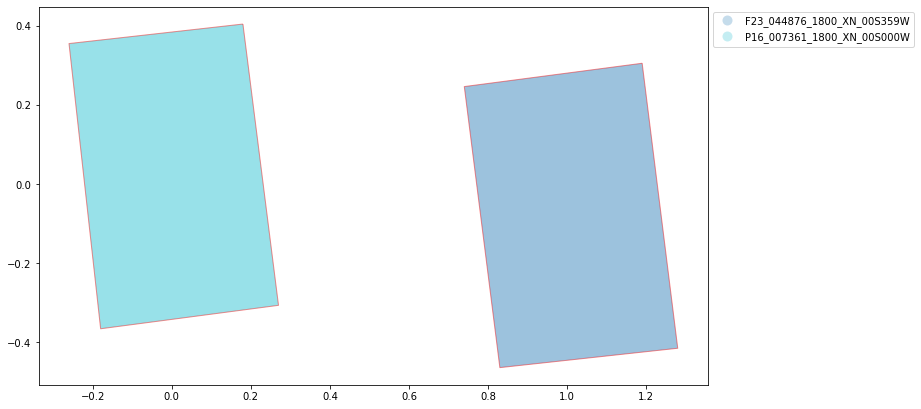

In [9]:
%matplotlib inline

gdf.plot(alpha=0.25, edgecolor='red', legend=True, column='pdsid', legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, figsize=(12,8))

## Using ODE search/result handler 

In [10]:
reload(ode)

<module 'gpt.search.ode' from '/Users/chbrandt/Coisas/repos/GMAP/gpt/gpt/search/ode.py'>

In [11]:
ode_search = ode.Search(target='mars', ihid='mro', iid='ctx', pt='edr')

In [12]:
ode_search.available_datasets()

,,,,DataSetId,IHName,IName,PTName,NumberProducts
ODEMetaDB,IHID,IID,PT,,,,,
Mars,MRO,CTX,EDR,MRO-M-CTX-2-EDR-L0-V1.0,Mars Reconnaissance Orbiter,Context Camera,Experiment Data Record,119030


In [13]:
results = ode_search.search(bounding_box, match='contain')

In [14]:
df = results.to_geodataframe(data_selectors={'Type':['product','browse'], 'FileName': ['JPEG$','IMG$']}, data_select_how='all', 
                             meta_selectors=['ihid','iid','pt','pdsid','target','Incidence_angle','Solar_longitude']
                             )
df

,ihid,iid,Incidence_angle,pdsid,pt,Solar_longitude,geometry,Description,FileName,KBytes,Type,URL
0,MRO,CTX,44.11,P16_007361_1800_XN_00S000W,EDR,34.81,"POLYGON ((0.18000 0.40520, 0.27000 -0.30640, -...",PRODUCT DATA FILE WITH LABEL,P16_007361_1800_XN_00S000W.IMG,35001,Product,https://pds-imaging.jpl.nasa.gov/data/mro/mars...
1,MRO,CTX,44.11,P16_007361_1800_XN_00S000W,EDR,34.81,"POLYGON ((0.18000 0.40520, 0.27000 -0.30640, -...",BROWSE IMAGE,P16_007361_1800_XN_00S000W.IMG.JPEG,12,Browse,https://pds-imaging.jpl.nasa.gov/data/mro/mars...
2,MRO,CTX,51.3,F23_044876_1800_XN_00S359W,EDR,112.52,"POLYGON ((1.19000 0.30600, 1.28000 -0.41500, 0...",PRODUCT DATA FILE WITH LABEL,F23_044876_1800_XN_00S359W.IMG,35001,Product,https://pds-imaging.jpl.nasa.gov/data/mro/mars...
3,MRO,CTX,51.3,F23_044876_1800_XN_00S359W,EDR,112.52,"POLYGON ((1.19000 0.30600, 1.28000 -0.41500, 0...",BROWSE IMAGE,F23_044876_1800_XN_00S359W.IMG.JPEG,2001,Browse,https://pds-imaging.jpl.nasa.gov/data/mro/mars...


<AxesSubplot:>

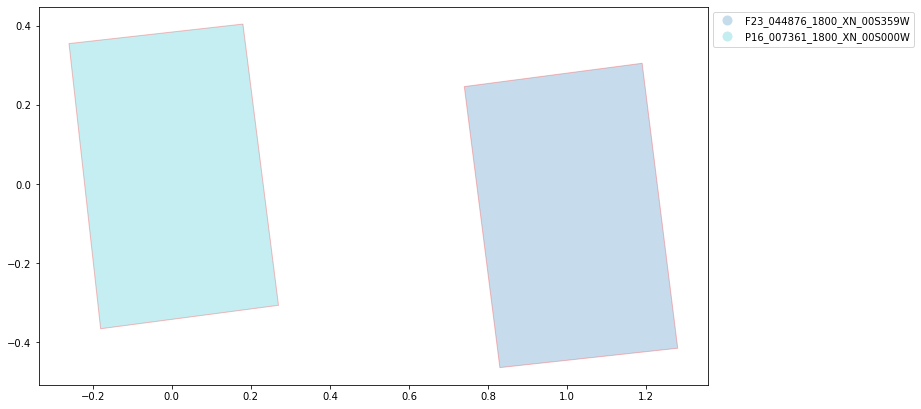

In [15]:
results.plot()

In [16]:
results.to_geojson('search.geojson')

'search.geojson'